#Decision Tree Classifier

In [ ]:
import pandas as pd
credit = pd.read_csv('/content/drive/MyDrive/datasets/credit_final.csv')
credit

,Unnamed: 0,credit.rating,account.balance,credit.duration.months,previous.credit.payment.status,credit.purpose,credit.amount,savings,employment.duration,installment.rate,...,residence.duration,current.assets,age,other.credits,apartment.type,bank.credits,occupation,dependents,telephone,foreign.worker
0,0,1,1,18,3,2,1049,1,1,4,...,4,2,21,2,1,1,3,1,1,1
1,1,1,1,9,3,4,2799,1,2,2,...,2,1,36,2,1,2,3,2,1,1
2,2,1,2,12,2,4,841,2,3,2,...,4,1,23,2,1,1,2,1,1,1
3,3,1,1,12,3,4,2122,1,2,3,...,2,1,39,2,1,2,2,2,1,2
4,4,1,1,12,3,4,2171,1,2,4,...,4,2,38,1,2,2,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,995,0,1,24,2,3,1987,1,2,2,...,4,1,21,2,1,1,2,2,1,1
996,996,0,1,24,2,4,2303,1,4,4,...,1,1,45,2,2,1,3,1,1,1
997,997,0,3,21,3,4,12680,4,4,4,...,4,4,30,2,3,1,4,1,2,1
998,998,0,2,12,2,3,6468,4,1,2,...,1,4,52,2,2,1,4,1,2,1


In [ ]:
feature_columns = list(credit.columns.difference(['credit.rating', 'Unnamed: 0'	]))
# credit[credit.columns.difference(['credit.rating', 'Unnamed: 0'])]
x = credit[feature_columns]
y = credit['credit.rating']

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 45, stratify = y)

print(x_train.shape, x_test.shape, y_test.shape, y_test.shape)


(700, 20) (300, 20) (300,) (300,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)


DecisionTreeClassifier()

In [ ]:
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, recall_score, f1_score

pred = clf.predict(x_test)
cm = confusion_matrix(y_test, pred)
ps = precision_score(y_test, pred)
acc = accuracy_score(y_test, pred)
rs = recall_score(y_test, pred)
f1 = f1_score(y_test, pred)

print(cm)
print('  TN, FN')
print('  FP, TP')
print('정확도: {}%'.format(round(acc*100, 2)))
print('정확도: {}%'.format(round(ps*100, 2)))
print('재현율: {}%'.format(round(rs*100, 2)))
print('f1 : {}%'.format(round(f1*100, 2)))

[[ 53  37]
 [ 53 157]]
  TN, FN
  FP, TP
정확도: 70.0%
정확도: 80.93%
재현율: 74.76%
f1 : 77.72%


# 성능지표 한번에 출력 classification_report(y_test, pred)

In [ ]:
from sklearn.metrics import classification_report
report = classification_report(y_test, pred)
print(report)

              precision    recall  f1-score   support

           0       0.50      0.59      0.54        90
           1       0.81      0.75      0.78       210

    accuracy                           0.70       300
   macro avg       0.65      0.67      0.66       300
weighted avg       0.72      0.70      0.71       300



In [ ]:
import sklearn
print(sklearn.__version__)

1.2.2


[[0. 1.]
 [0. 1.]
 [1. 0.]]


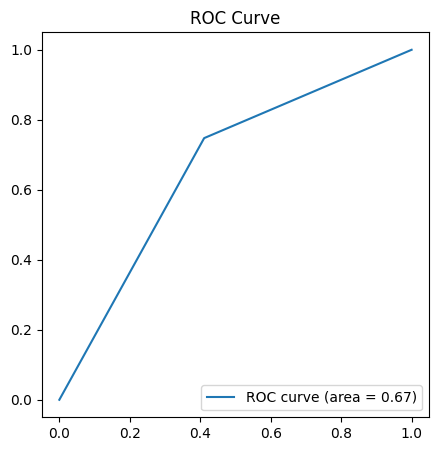

In [ ]:
from sklearn.metrics import  roc_curve, auc
plt.figure(figsize = (5, 5))
y_scores = clf.predict_proba(x_test)[:, 1]
print(clf.predict_proba(x_test)[:3,:])
fp, tp, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fp, tp)  # AUC 값 계산
plt.plot(fp, tp, label=f'ROC curve (area = {roc_auc:.2f})')
plt.title('ROC Curve')
# AUC 값 표시
plt.legend(loc='lower right')
plt.show()

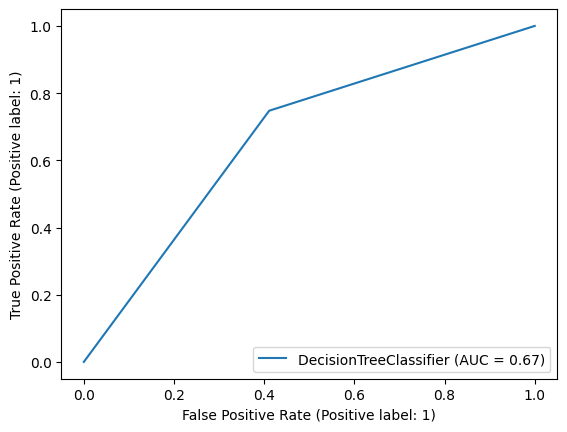

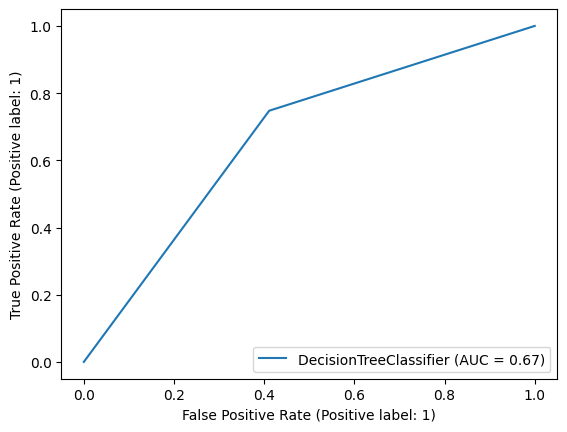

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve, auc

from sklearn.metrics import RocCurveDisplay

roc_disp = RocCurveDisplay.from_estimator(clf, x_test, y_test)

roc_disp.plot()
plt.show()

#변수의 중요도 확인

In [ ]:
dir(clf)

['__abstractmethods__',
 '__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_abc_impl',
 '_check_feature_names',
 '_check_n_features',
 '_estimator_type',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_prune_tree',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_validate_X_predict',
 '_validate_data',
 '_validate_params',
 'apply',
 'ccp_alpha',
 'class_weight',
 'classes_',
 'cost_complexity_pruning_path',
 'criterion',
 'decision_path',
 'feature_importances_',
 'feature_names_in_',
 'fit',
 'get_depth',
 'get_n_leaves',
 'get_params',
 'max_depth',
 'max_features',
 'ma

In [ ]:
importances = clf.feature_importances_ #결정 트리 기반의 모델들(예: 결정 트리, 랜덤 포레스트, 그래디언트 부스팅 트리 등)에서 사용되는 속성으로, 각 특성(feature)의 중요도를 나타냄
column_nm = pd.DataFrame(x.columns)
feature_importances = pd.concat([column_nm, pd.DataFrame(importances)], axis = 1)
feature_importances.columns = ['feature_nm', 'importances']
print(feature_importances)

                        feature_nm  importances
0                  account.balance     0.134947
1                              age     0.108376
2                   apartment.type     0.020246
3                     bank.credits     0.013997
4                    credit.amount     0.240516
5           credit.duration.months     0.091614
6                   credit.purpose     0.033796
7                   current.assets     0.032925
8                       dependents     0.026865
9              employment.duration     0.024264
10                  foreign.worker     0.000000
11                       guarantor     0.004760
12                installment.rate     0.022660
13                  marital.status     0.023343
14                      occupation     0.032629
15                   other.credits     0.014512
16  previous.credit.payment.status     0.042984
17              residence.duration     0.040165
18                         savings     0.062610
19                       telephone     0

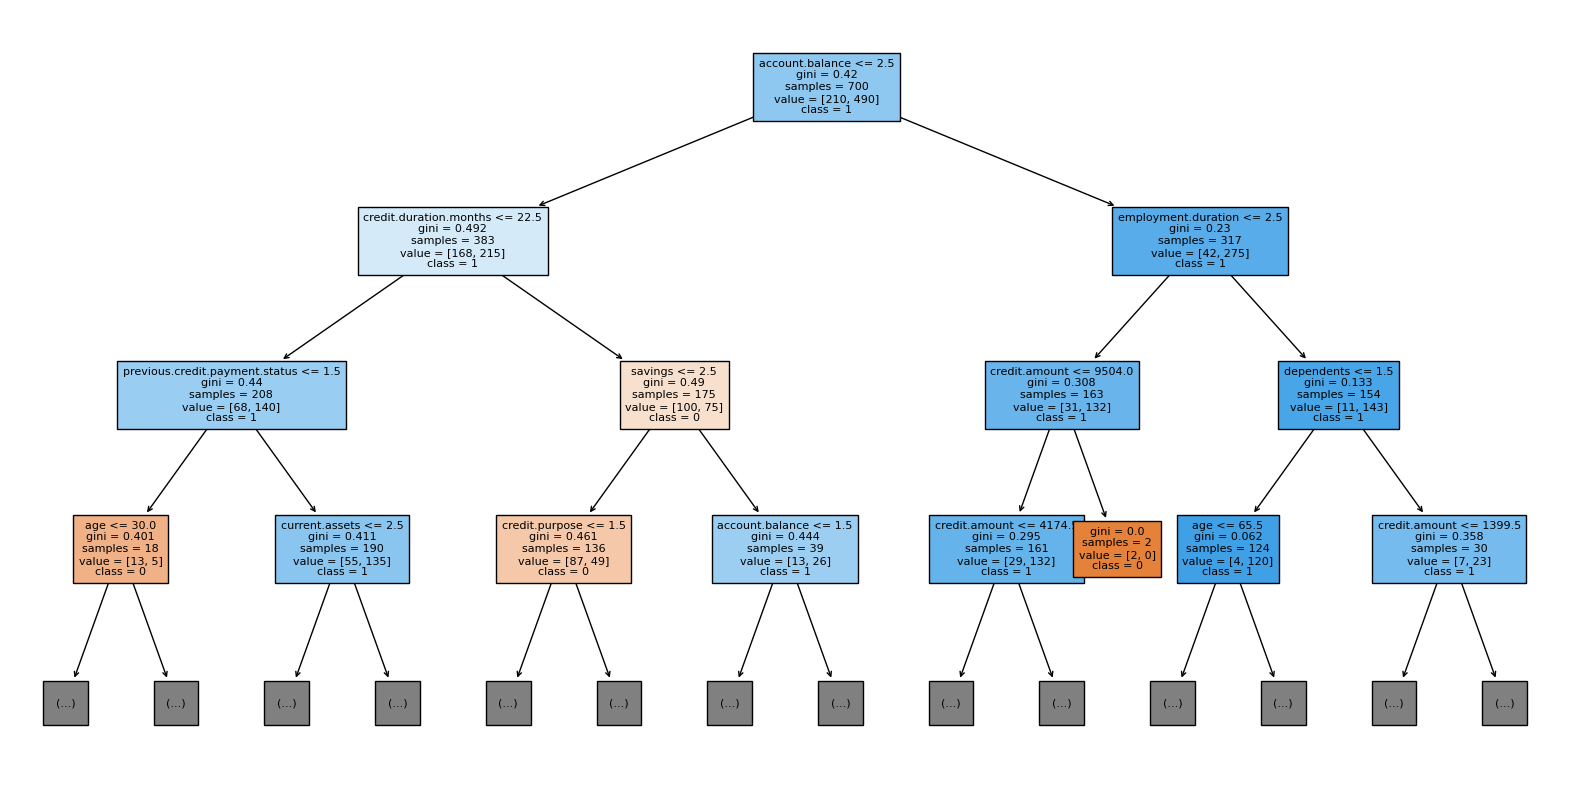

In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
import numpy as np
feature_names = feature_columns
target_names = np.array(['0', '1'])
# 결정 트리 모델 시각화
plt.figure(figsize=(20, 10))  # 그래프의 크기 조정,  트리의 깊이 제한: 만약 트리가 매우 깊다면, max_depth 매개변수를 사용하여 표시할 트리의 깊이를 제한
plot_tree(clf, feature_names=feature_names, class_names=target_names, filled=True, fontsize=8, max_depth=3) #폰트 크기 조정: plot_tree 함수 내에서 fontsize 매개변수를 사용하여 텍스트의 크기를 조절
plt.show()

In [ ]:
import numpy as np
feature_names = feature_columns
target_names = np.array(['0', '1'])

import pydot
import pydotplus
import graphviz
from sklearn.tree import export_graphviz
dt_dot_data = export_graphviz(clf, feature_names = feature_names,
                              class_names = target_names,
                              filled = True, rounded = True,
                              special_characters = True)
dt_graph = pydotplus.graph_from_dot_data(dt_dot_data)

from IPython.display import Image
Image(dt_graph.create_png())

Output hidden; open in https://colab.research.google.com to view.